In [1]:
df = spark.sql("""select date, sum(cases) as numCases, state 
from
covid19.us_states
where state = 'Virginia' or state = 'Maryland' or state = 'California' or state = 'Washington'
group by date, state
order by date asc, sum(cases) desc""")
df.show()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1585676770922_0005,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------+----------+
|      date|numCases|     state|
+----------+--------+----------+
|2020-01-21|       1|Washington|
|2020-01-22|       1|Washington|
|2020-01-23|       1|Washington|
|2020-01-24|       1|Washington|
|2020-01-25|       1|Washington|
|2020-01-25|       1|California|
|2020-01-26|       2|California|
|2020-01-26|       1|Washington|
|2020-01-27|       2|California|
|2020-01-27|       1|Washington|
|2020-01-28|       2|California|
|2020-01-28|       1|Washington|
|2020-01-29|       2|California|
|2020-01-29|       1|Washington|
|2020-01-30|       2|California|
|2020-01-30|       1|Washington|
|2020-01-31|       3|California|
|2020-01-31|       1|Washington|
|2020-02-01|       3|California|
|2020-02-01|       1|Washington|
+----------+--------+----------+
only showing top 20 rows

In [2]:
%spark -o df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
df_states = spark.sql("""select state 
from
covid19.us_states
where state = 'Virginia' or state = 'Maryland' or state = 'California' or state = 'Washington'
group by state
order by state""")
df_states.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+
|     state|
+----------+
|California|
|  Maryland|
|  Virginia|
|Washington|
+----------+

In [4]:
%spark -o df_states

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

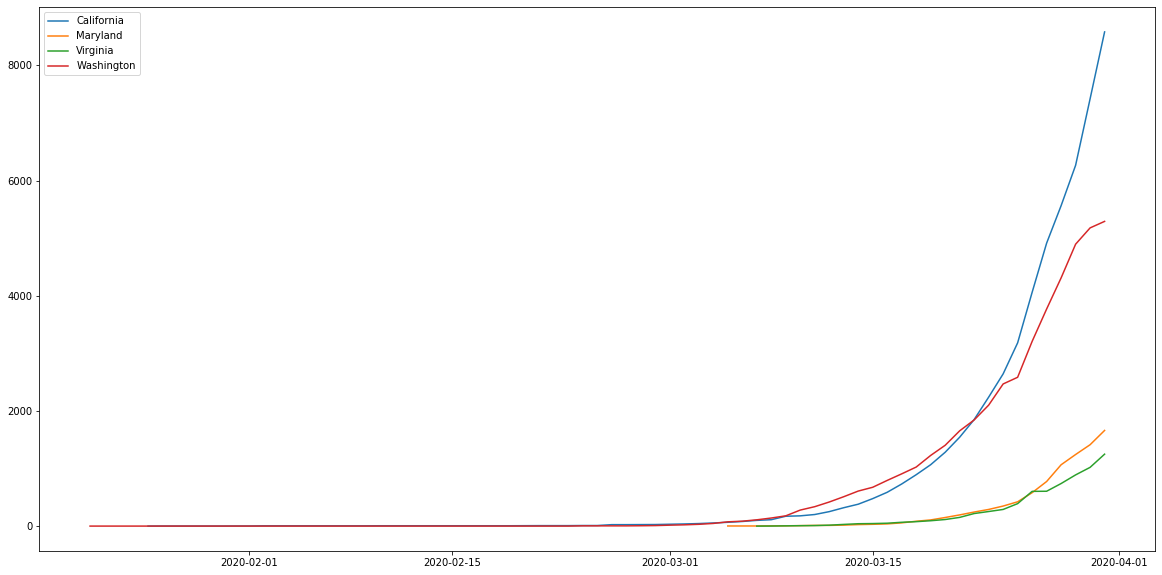

In [6]:
%local
import matplotlib.pyplot as plt
%matplotlib inline
#df_states
plt.figure(figsize=(20,10))
for index in df_states.index:
   #print(df_states['state'][index])
   #print(df.loc[df['state']==df_states['state'][index]])
   plt.plot('date', 'numCases', data=df.loc[df['state']==df_states['state'][index]],label=df_states['state'][index])

plt.legend()
plt.show()


In [7]:
df_counties = spark.sql("""select date, cases, concat(county,', ', state) as county_state from 
covid19.us_counties
where month(date) > 2 
group by date, cases, concat(county,', ', state)
order by date, cases desc""")
df_counties.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+
|      date|cases|        county_state|
+----------+-----+--------------------+
|2020-03-01|   13|   Douglas, Nebraska|
|2020-03-01|   12|  Solano, California|
|2020-03-01|   11|        Bexar, Texas|
|2020-03-01|   11|    King, Washington|
|2020-03-01|    7|Santa Clara, Cali...|
|2020-03-01|    4| Spokane, Washington|
|2020-03-01|    3|San Francisco, Ca...|
|2020-03-01|    3|Sacramento, Calif...|
|2020-03-01|    3|      Cook, Illinois|
|2020-03-01|    2|Unknown, Rhode Is...|
|2020-03-01|    2|Snohomish, Washin...|
|2020-03-01|    2|  Washington, Oregon|
|2020-03-01|    1|     Dane, Wisconsin|
|2020-03-01|    1|Humboldt, California|
|2020-03-01|    1|    Napa, California|
|2020-03-01|    1|   Marin, California|
|2020-03-01|    1|Hillsborough, Flo...|
|2020-03-01|    1|Los Angeles, Cali...|
|2020-03-01|    1|  Orange, California|
|2020-03-01|    1|New York City, Ne...|
+----------+-----+--------------------+
only showing top 20 rows

In [8]:
%spark -o df_counties

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
df_dates = spark.sql("""select date from covid19.us_counties where month(date) > 2 group by date order by date""")
df_dates.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+
|      date|
+----------+
|2020-03-01|
|2020-03-02|
|2020-03-03|
|2020-03-04|
|2020-03-05|
|2020-03-06|
|2020-03-07|
|2020-03-08|
|2020-03-09|
|2020-03-10|
|2020-03-11|
|2020-03-12|
|2020-03-13|
|2020-03-14|
|2020-03-15|
|2020-03-16|
|2020-03-17|
|2020-03-18|
|2020-03-19|
|2020-03-20|
+----------+
only showing top 20 rows

In [10]:
%spark -o df_dates

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
df_top10counties = spark.sql("""select concat(county,', ', state) as county_state, cases from
covid19.us_counties
where date = '2020-03-30'
group by concat(county,', ', state), cases
order by cases desc
limit 10""")
df_top10counties.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|        county_state|cases|
+--------------------+-----+
|New York City, Ne...|38087|
|Westchester, New ...| 9326|
|    Nassau, New York| 7344|
|   Suffolk, New York| 5791|
| Unknown, New Jersey| 3840|
|      Cook, Illinois| 3727|
|     Wayne, Michigan| 3195|
|  Rockland, New York| 2511|
|  Bergen, New Jersey| 2482|
|Los Angeles, Cali...| 2474|
+--------------------+-----+

In [12]:
%spark -o df_top10counties

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

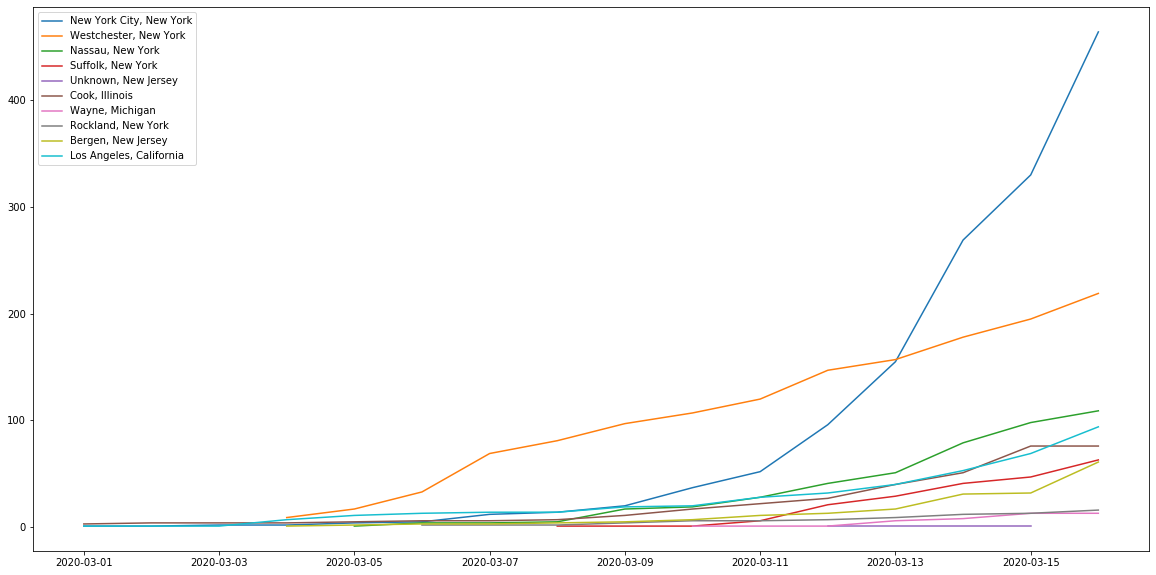

In [13]:
%local
from datetime import datetime
#df_counties
plt.figure(figsize=(20,10))
for index in df_top10counties.index:
   #print(df_top10counties['county_state'][index])
   #print(df_counties.loc[df_counties['county_state']==df_top10counties['county_state'][index]])
   plt.plot('date', 'cases', data=df_counties.loc[df_counties['county_state']==df_top10counties['county_state'][index]],label=df_top10counties['county_state'][index])
   plt.text
#plt.xticks(np.arange(min(df_dates.date), max(df_dates.date), np.timedelta64(15, 'D')))
plt.legend()
plt.show()

In [14]:
df_top10counties_cumulative = spark.sql("""select concat(county,', ', state) as county_state, sum(cases) as cumulativeCases from
covid19.us_counties
group by concat(county,', ', state)
order by sum(cases) desc
limit 10""")
df_top10counties_cumulative.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------------+
|        county_state|cumulativeCases|
+--------------------+---------------+
|New York City, Ne...|         267072|
|Westchester, New ...|          67787|
|    Nassau, New York|          50077|
|   Suffolk, New York|          36038|
|      Cook, Illinois|          24716|
|    King, Washington|          23460|
|     Wayne, Michigan|          19026|
| Unknown, New Jersey|          18860|
|Los Angeles, Cali...|          16184|
|  Bergen, New Jersey|          16103|
+--------------------+---------------+

In [16]:
df_DMVcounties = spark.sql("""select date, cases, concat(county,', ', state) as county_state from 
covid19.us_counties
where month(date) > 2 and 
( state = 'Virginia' or state = 'Maryland' or state = 'District of Columbia' )
group by date, cases, concat(county,', ', state)
order by date, cases desc""")
df_DMVcounties.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+
|      date|cases|        county_state|
+----------+-----+--------------------+
|2020-03-05|    3|Montgomery, Maryland|
|2020-03-06|    3|Montgomery, Maryland|
|2020-03-07|    3|Montgomery, Maryland|
|2020-03-07|    1|District of Colum...|
|2020-03-07|    1|   Fairfax, Virginia|
|2020-03-08|    4|Montgomery, Maryland|
|2020-03-08|    2|   Fairfax, Virginia|
|2020-03-08|    1|District of Colum...|
|2020-03-08|    1|   Harford, Maryland|
|2020-03-09|    4|Montgomery, Maryland|
|2020-03-09|    4|   Fairfax, Virginia|
|2020-03-09|    4|District of Colum...|
|2020-03-09|    1|Virginia Beach ci...|
|2020-03-09|    1|Prince George's, ...|
|2020-03-09|    1|   Harford, Maryland|
|2020-03-10|    5|Montgomery, Maryland|
|2020-03-10|    4|District of Colum...|
|2020-03-10|    4|   Fairfax, Virginia|
|2020-03-10|    3|Prince George's, ...|
|2020-03-10|    2|   Loudoun, Virginia|
+----------+-----+--------------------+
only showing top 20 rows

In [19]:
df_top10DMVcounties = spark.sql("""select concat(county,', ', state) as county_state, cases from
covid19.us_counties
where date = '2020-03-30' and 
( state = 'Virginia' or state = 'Maryland' or state = 'District of Columbia' )
group by concat(county,', ', state), cases
order by cases desc
limit 10""")
df_top10DMVcounties.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|        county_state|cases|
+--------------------+-----+
|District of Colum...|  495|
|Montgomery, Maryland|  341|
|Prince George's, ...|  294|
|   Fairfax, Virginia|  225|
| Baltimore, Maryland|  186|
|Baltimore city, M...|  152|
|Anne Arundel, Mar...|  110|
|    Howard, Maryland|   96|
| Arlington, Virginia|   86|
|   Carroll, Maryland|   83|
+--------------------+-----+

In [18]:
%spark -o df_DMVcounties

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
%spark -o df_top10DMVcounties

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

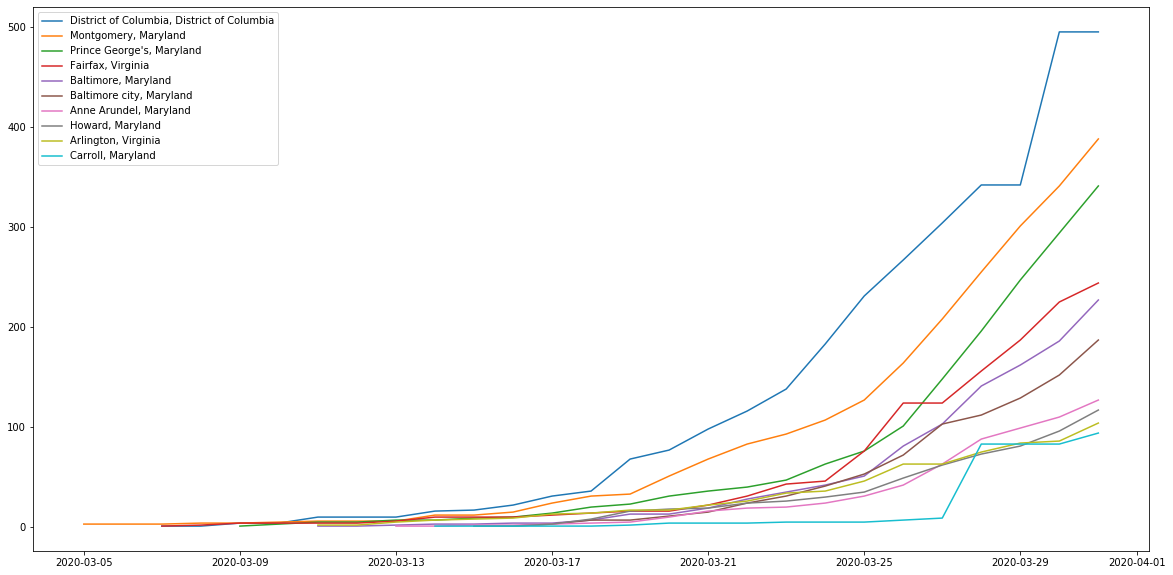

In [21]:
%local
from datetime import datetime

plt.figure(figsize=(20,10))
for index in df_top10DMVcounties.index:
   plt.plot('date', 'cases', data=df_DMVcounties.loc[df_DMVcounties['county_state']==df_top10DMVcounties['county_state'][index]],label=df_top10DMVcounties['county_state'][index])
   plt.text
plt.legend()
plt.show()